In [1]:
# Insert below the path of the developer version of pyBBarolo (= the git repo)
# This way, we can override any other installed version and 
# modify pyBBarolo without the need of reinstalling it every time
import sys
sys.path.insert(0, "/Users/blanca/Documents/TESIS/software/Bbarolo-1.7")

# i just copied the repository

# This should give version 1.3.2dev!
from pyBBarolo import version
print (version)
import pyBBarolo as BB
import pyBBarolo.utils as ut
from pyBBarolo.bayesian import BayesianBBarolo

from dynesty import plotting as dyplot
from astropy.table import Table 
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
import os, subprocess
from astropy.io import fits
BBmain = "/Users/blanca/Documents/TESIS/software/Bbarolo-1.7/BBarolo"


1.3.2dev


[Blancas-MacBook-Pro.local:93775] shmem: mmap: an error occurred while determining whether or not /var/folders/jn/tjkfv7yj6vx0n23cdyjdp_9w0000gn/T//ompi.Blancas-MacBook-Pro.501/jf.0/1813512192/sm_segment.Blancas-MacBook-Pro.501.6c180000.0 could be created.


model 4 has constant vdisp and model 3 has the linear thing

In [2]:
# Name of the FITS file to be fitted
fitsname = "/Users/blanca/Documents/TESIS/software/code/models/model3.fits"
ringfile = "/Users/blanca/Documents/TESIS/software/code/models/model3.txt"
outputfile = "/Users/blanca/Documents/TESIS/software/code/nautilus_test/model3_test1/"

## Fitting:

In [3]:
# f = BB.Search._compute(fitsname) i think this might do something formy problem 

# Creating an object for bayesian barolo
f3d = BayesianBBarolo(fitsname)
th  = multiprocessing.cpu_count() #this counts my cpu so that the code can run with all of them

# Initializing rings. All parameters should be given.
# No-fitted parameters will be used for all models, while fitted parameters 
# are actually not even used for initial guesses.
rad = np.arange(180,1250,360)  

#I will write the initial parameters here 
xpos=36.959
ypos=38.199
vsys=0.0
vrad=0
z0=0
inc=50.988
phi=124.147

f3d.init(radii=rad,xpos=xpos,ypos=ypos,vsys=vsys,\
         vrot=120,vdisp=8,vrad=vrad,z0=z0,inc=inc,phi=phi)
# so basically if all the parameters are free the initial guesses are irrelevant?

# Here it is possible to give any other BBarolo parameter, for example to control
# the mask, linear, bweight, cdens, wfunc, etc...
f3d.set_options(mask="SEARCH",linear=0.85)
f3d.show_options()

# Default priors are uniform and the default boundaries for the fit are in f3d.bounds. ****
# Here I modify some of them to help convergence for this particular galaxy. --> adapt for every cube!!

#THESE ARE THE BOUNDS ENRICO USED: so the bounds for model 1
#f3d.bounds['vrot']  = [0,250]
#f3d.bounds['vdisp'] = [0,40]
#f3d.bounds['inc']   = [50,70]
#f3d.bounds['phi']   = [20,40]
#f3d.bounds['z0']    = [0,60]
#f3d.bounds['xpos']  = [20,30]
#f3d.bounds['ypos']  = [20,30]
#f3d.bounds['vsys']  = [-20,20] 

f3d.bounds['vrot']  = [0,400]
f3d.bounds['vdisp'] = [0,50]
f3d.bounds['inc']   = [40,60] #[40,60]
f3d.bounds['phi']   = [115,135] #123.7 [300,350]
#f3d.bounds['z0']    = [0,10] 
f3d.bounds['xpos']  = [30,45] #[30,45]
f3d.bounds['ypos']  = [30,45] #[30,45]
f3d.bounds['vsys']  = [110,150] 

# Running the fit with dynesty.
# To fit a parameter ring-by-ring, just use the parameter name in freepar
# To fit a parameter with a single value, add a '_single' to the parameter name
# In this example, I fit 14 parameters: 4 vrot, 4 vdisp, 1 inc, 1 pa, 1 z0, 1 xpos, 1 ypos and 1 vsys
f3d.compute(threads=th, method="nautilus",freepar=['vrot','vdisp','inc_single','phi_single','xpos_single','ypos_single','vsys_single'])
#'z0_single',

#.savefig(outputfile+'mask.pdf',bbox_inches='tight')

HEADER WARNING: TELESCOP-INSTRUME keywords not found.

Opening file /Users/blanca/Documents/TESIS/software/code/models/model3.fits
Reading 75 x 75 x 62 pixels FITS file (1.3 MB)... Done. 

##### Input parameters for BBarolo #####
FITSFILE           /Users/blanca/Documents/TESIS/software/code/models/model3.fits 
MASK               SEARCH 
LINEAR             0.85 

Starting the nautilus sampler...
Please report issues at github.com/johannesulf/nautilus.
Status    | Bounds | Ellipses | Networks | Calls    | f_live | N_eff | log Z    
Finished  | 27     | 1        | 4        | 64272    | N/A    | 32614 | -22.05   
[123.70872131 135.10839279 145.24006578  26.33400719  23.80296904
  15.20531897  52.21240646 124.37398147  37.05387238  38.24620064
 133.87305405]
Sampling with nautilus took 6.69 minutes to run.


array([123.70872131, 135.10839279, 145.24006578,  26.33400719,
        23.80296904,  15.20531897,  52.21240646, 124.37398147,
        37.05387238,  38.24620064, 133.87305405])

print(f3d.bounds)
with open(os.path.join(f"{outputfile}", f"bounds_used.txt"), 'w') as file:
    file.write(f"Name of the model = {modname}\n")
    file.write("\n")
    file.write("CUBE PARAMETERS\n")
    file.write("\n")
    file.write(f"Number of pixels in x/y = {xysize}\n")
    file.write(f"Size of pixels (arcsec)= {xysize}\n")
    file.write(f"Number of channels = {xysize}\n")
    file.write(f"Channel width = {chwidth}\n")
    file.write(f"Beam width = {beamFWHM}\n")
    file.write(f"RMS noise in Jy/beam = {xysize}\n")
    file.write(f"crvals = {crvals}\n")
    file.write(f"crpixs = {crpixs}\n")
    file.write("\n")
    file.write("GALAXY PARAMETERS\n")

## Model of resulting parameters:

In [4]:
print(f3d.freepar_idx)
#print(f3d.freepar_names)
print(f3d.ndim)


#we calculate the parameters of the initial mock
# Open the FITS file
hdul = fits.open(fitsname)
modname   = 'barbamodel' #this is the name of the model
# Get the header of the primary HDU (Header Data Unit)
fi = hdul[0].header
#these are the sizes
xaxis = fi['NAXIS1']
yaxis = fi['NAXIS2']
zaxis = fi['NAXIS3']
xaxis = fi['NAXIS1']
#here the cdelts
pix1 = np.abs(fi['CDELT1']) #check if this works!
pix2 = fi['CDELT2']
chan = fi['CDELT3']
# the beam
bea = fi['BMAJ']

#creating the shape of the model
sim = ut.SimulatedGalaxyCube(axisDim=[xaxis, yaxis, zaxis],\
                        cdelts=[pix1, pix2, chan],\
                        beam=bea, bunit='JY/BEAM', obj=modname)


#we set the parameters
vel  = f3d.params[f3d.freepar_idx["vrot"]]

disp = f3d.params[f3d.freepar_idx["vdisp"]]

if "inc" in f3d.freepar_idx:
    inc  = np.full(len(rad),f3d.params[f3d.freepar_idx["inc"]])
else:
    inc = np.full(len(rad), inc)   

if "phi" in f3d.freepar_idx:
    phi  =  np.full(len(rad),f3d.params[f3d.freepar_idx["phi"]])
else:
    phi = np.full(len(rad), phi)    

z0d   = np.full(len(rad),0.000)

if "xpos" in f3d.freepar_idx:
    xpos  = np.full(len(rad),f3d.params[f3d.freepar_idx["xpos"]])
else:
    xpos = np.full(len(rad), xpos)

if "ypos" in f3d.freepar_idx:
    ypos  = np.full(len(rad),f3d.params[f3d.freepar_idx["ypos"]])
else:
    ypos = np.full(len(rad), ypos)    
    

vsy = np.full(len(rad),f3d.params[f3d.freepar_idx["vsys"]])

dens   = np.full(len(rad),1)
#50*np.exp(-rad/400-100/(0.5*rad+100)) #I will do this for now but ideally this is in the bbarolo?
#noiserms  = 0.08 #again i need to find a way to get this number?


# Setting up galaxy parameters (if parameters are not given, they are random!)
sim.define_galaxy(radii=rad,vsys=vsy,vdisp=disp,inc=inc,pa=phi,\
                dens=dens,z0=z0d,vrot=vel,warpinc=False,warppa=False)


# Running BB and creating a model
print (f"Simulating {modname}...",flush=True,end='')
sim.run(exe=BBmain, stdout='null', outfolder=outputfile+modname, smooth=True)



print (f"Done! ")


{'vrot': array([0, 1, 2]), 'vdisp': array([3, 4, 5]), 'inc': array([6]), 'phi': array([7]), 'xpos': array([8]), 'ypos': array([9]), 'vsys': array([10])}
11
WARNING, CDELT1 should be negative!


AttributeError: 'BayesianBBarolo' object has no attribute 'params'

## Dynesty outputs:

FileNotFoundError: [Errno 2] No such file or directory: '/Users/blanca/Documents/TESIS/software/code/nautilus_test/model3_test1/output_run.pdf'

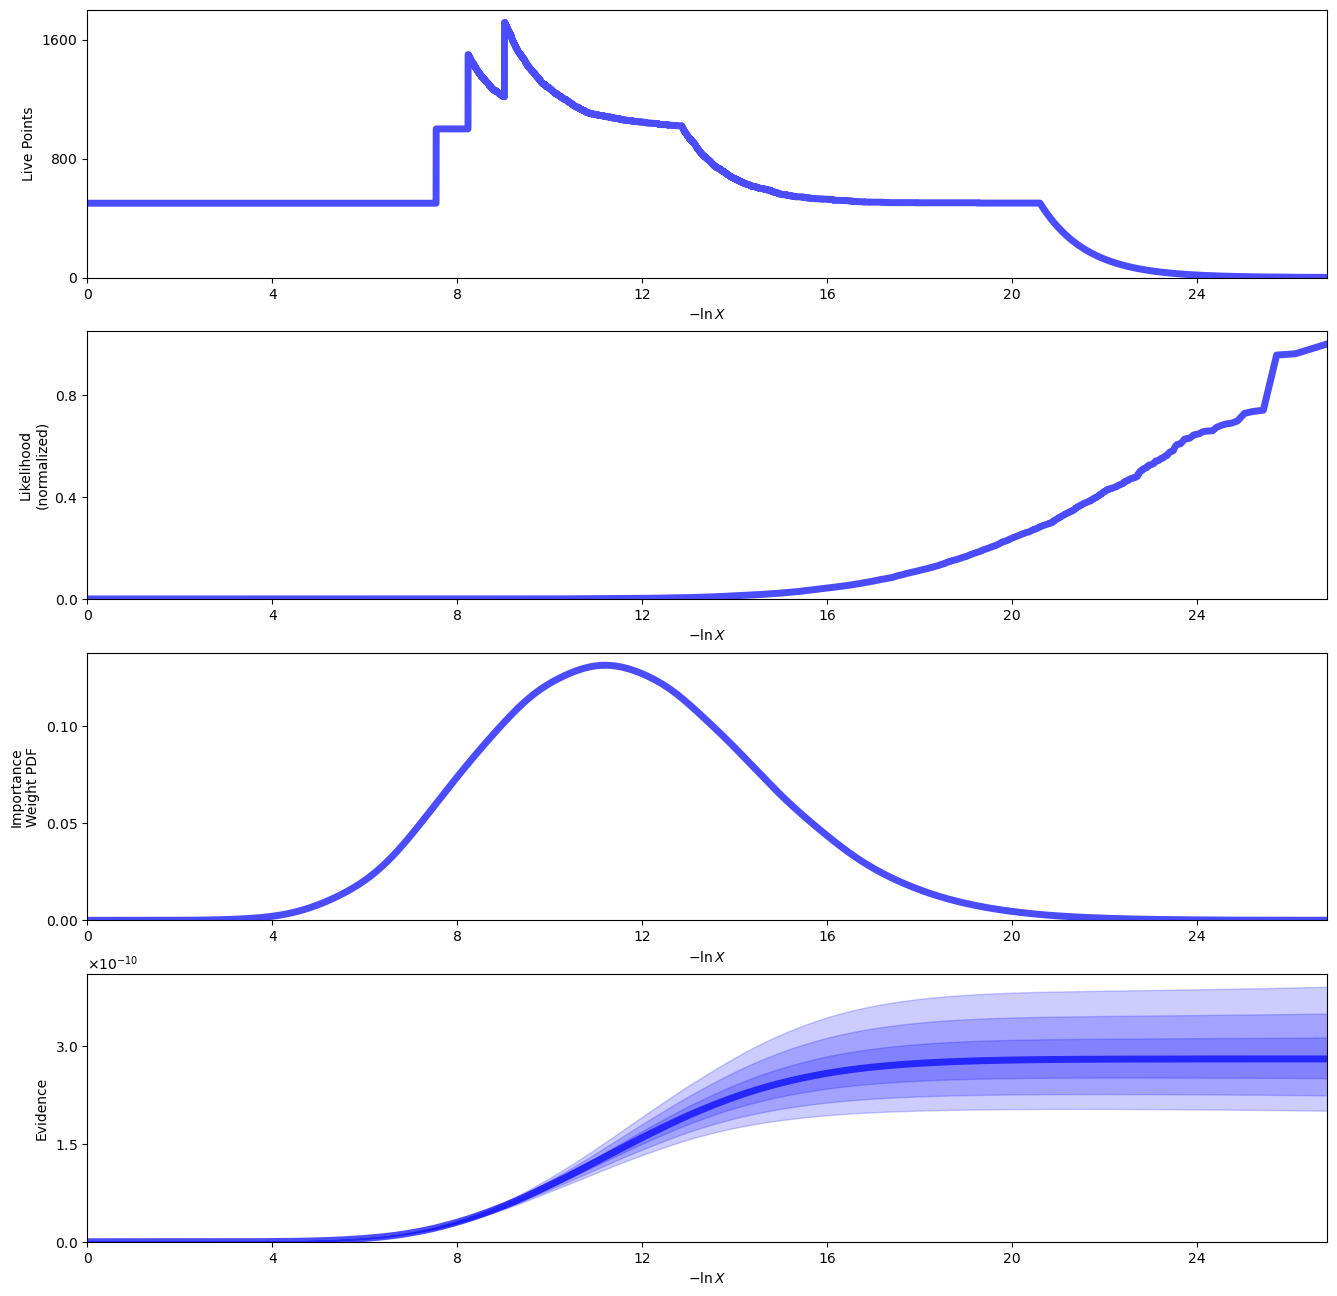

In [ ]:
results = f3d.results
#print(results)

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)
rfig.savefig(outputfile+'output_run.pdf',bbox_inches='tight')

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)
tfig.savefig(outputfile+'posteriors.pdf',bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/blanca/Documents/TESIS/software/code/nautilus_test/model3_test1/corner.pdf'

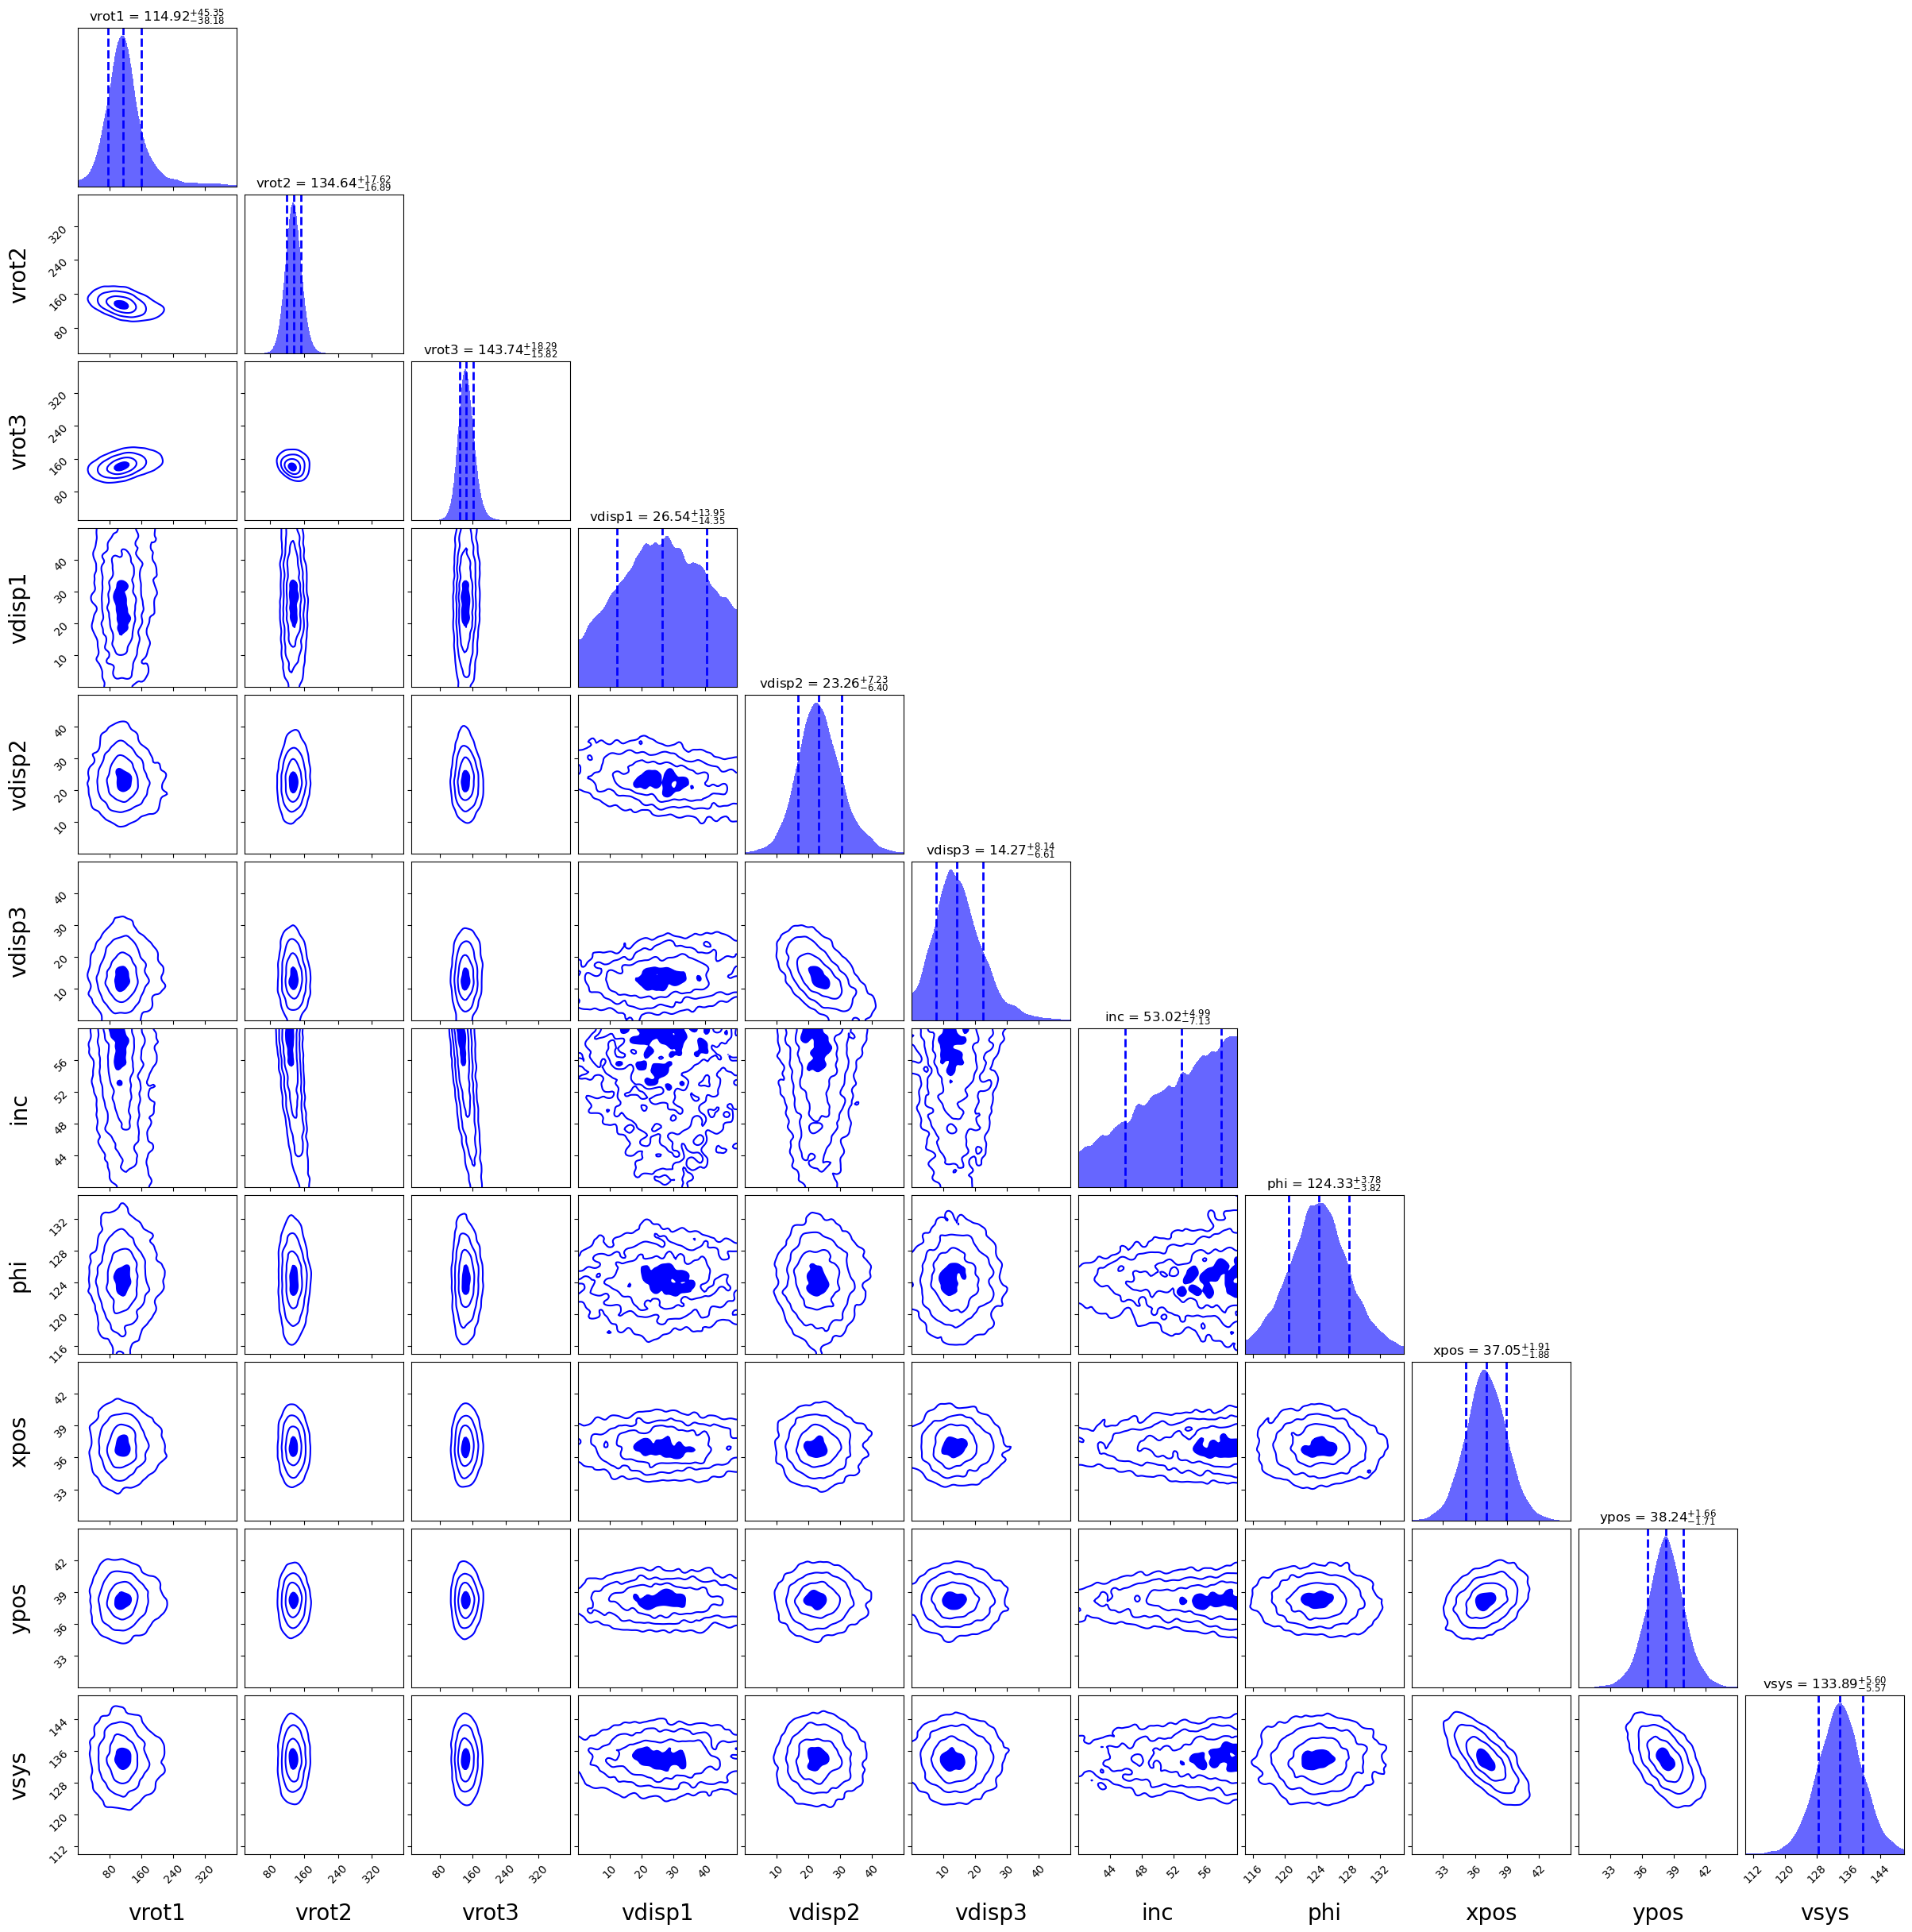

In [ ]:
# Plot the 2-D marginalized posteriors.
quantiles = [0.16,0.50,0.84] # are these the contours?
cfig, caxes = dyplot.cornerplot(results,show_titles=True,title_quantiles=quantiles,
                                quantiles=quantiles, color='blue',max_n_ticks=5, labels=f3d.freepar_names, \
                                label_kwargs=dict(fontsize=20))
cfig.savefig(outputfile+'corner.pdf',bbox_inches='tight')

## Errors:

In [ ]:
samples = f3d.results.samples #these are all the samples that dynesty got, the last array are the parameters
print(samples)
weights = np.exp(f3d.results.logwt - f3d.results.logz[-1])
print("logwtt",f3d.results.logwt,"logz",f3d.results.logz[-1])
params = np.average(samples, axis=0, weights=weights) #mean of values 

rad_mc = f3d._inri.r['radii']  # Get the radii array
labs = f3d.freepar_names

ra, pp, err_up, err_low = np.zeros(shape=(4, len(params)))
# Adjust how we index rad_mc for vrot and vdisp parameters, using modulo if needed
for i in range(len(params)):
    mcmc = np.percentile(samples[:, i], [15.865, 50, 84.135])
    print(mcmc)
    q = np.diff(mcmc)
    print("this is q",q)
    txt = "%10s = %10.3f %+10.3f %+10.3f" % (labs[i], mcmc[1], -q[0], q[1])
    
    pp[i] = mcmc[1]
    err_low[i] = q[0]
    err_up[i] = q[1]
    
    # For vrot and vdisp parameters, assign the radius values
    if labs[i].startswith("vrot") or labs[i].startswith("vdisp"):
        # Use modulo indexing to ensure we don't go out of bounds (repeat the radii if necessary)
        idx = i % len(rad_mc)  # Ensure the index is within bounds
        ra[i] = rad_mc[idx]
    else:
        ra[i] = None  # No radius for other parameters

output_file = "errors.txt"
with open(outputfile+output_file, "w") as file:
    file.write(f"#{'Parameter':<15}{'Median':<15}{'Error_Low':<15}{'Error_Up':<15}{'Radius':<15}\n")
    
    for i in range(len(params)):

        # Check if the parameter is vrot or vdisp and write the radius
        if labs[i].startswith("vrot") or labs[i].startswith("vdisp"):

            # If the radius is None, print 'N/A' for the radius
            radius_str = f"{ra[i]:<15.6f}" if ra[i] is not None else "N/A"
            file.write(f"{labs[i]:<15}{pp[i]:<15.6f}{err_low[i]:<15.6f}{err_up[i]:<15.6f}{radius_str}\n")
        else:
            # Write the parameters without radius (vsys, inc, pa, xpos, ypos, etc.)
            file.write(f"{labs[i]:<15}{pp[i]:<15.6f}{err_low[i]:<15.6f}{err_up[i]:<15.6f}{"N/A":<15}\n")

with open(outputfile+output_file, "r") as file:
    content = file.read()
print(content)

print(f"Results saved to {output_file}")


[[368.93120962 105.52746744 152.63727039 ...  34.77700072  44.21114623
  118.03481284]
 [ 73.12034623 187.71463158  29.06855847 ...  30.75690635  38.45445316
  143.62795602]
 [322.8940935  183.57524798 296.64294652 ...  33.35920922  42.41260108
  124.51234602]
 ...
 [159.62366916 142.83594207 163.6507683  ...  37.39719355  39.00889427
  133.40634598]
 [120.45340929 142.94991825 158.63309959 ...  36.78459223  38.09207962
  135.36437934]
 [201.42691811 258.93856314 259.46728612 ...  36.81179048  38.45391611
  134.37491071]]
logwtt [-61.31562879 -59.98019912 -59.22287478 ... -30.52935418 -30.51913003
 -30.47522956] logz -19.511266232984426
[ 67.45684699 121.10504093 248.71683213]
this is q [ 53.64819393 127.61179121]
[ 84.3124312  116.84702627 250.52910578]
this is q [ 32.53459507 133.68207951]
[ 87.03890362 126.92824792 273.09407828]
this is q [ 39.8893443  146.16583035]
[12.47963697 25.90373282 39.61781662]
this is q [13.42409585 13.7140838 ]
[14.46913851 21.83638727 29.47396107]
this i

## THIS CODE IS WHEN WE USE REAL DATA


#Compare with "real" input parameters, this is now comparing with the output of bbarolo (normal)

#ringfile = '/Users/blanca/Documents/TESIS/software/Bbarolo-1.7/output/SGP38326/rings_final1.txt'
t = Table.read(ringfile,format='ascii')
print(t.colnames)


fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(11,16))
ax = np.ravel(ax)
for a in ax:
    a.set_xlabel("radius (arcsec)")
print(f3d._inri.r.keys())
rad_mc = f3d._inri.r['radii']
print(rad_mc)
idx = f3d.freepar_idx['vrot']
ax[0].plot(t['RAD(arcs)'],t['VROT(km/s)'],label='input')
ax[0].errorbar(rad_mc,pp[idx],fmt='o',yerr=[err_low[idx],err_up[idx]],label='recovered')
ax[0].set_ylabel("vrot (km/s)")
ax[0].legend(loc='lower right')

idx = f3d.freepar_idx['vdisp']
ax[1].plot(t['RAD(arcs)'],t['DISP(km/s)'])
ax[1].errorbar(rad_mc,pp[idx],fmt='o',yerr=[err_low[idx],err_up[idx]])
ax[1].set_ylabel("vdisp (km/s)")

#idx = f3d.freepar_idx['inc']
#ax[2].plot(t['RAD(arcs)'],t['INC(deg)'])
#ax[2].#axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
#ax[2].#axhline(pp[idx][0],ls='--',color='orange')
#ax[2].set_ylabel("inc (deg)")
#ax[2].set_ylim(t['INC(deg)'][0]-20,t['INC(deg)'][0]+20)

#idx = f3d.freepar_idx['phi']
#ax[3].plot(t['RAD(arcs)'],t['P.A.(deg)'])
#ax[3].#axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
#ax[3].#axhline(pp[idx][0],ls='--',color='orange')
#ax[3].set_ylabel("phi (deg)")
#ax[3].set_ylim(t['P.A.(deg)'][0]-10,t['P.A.(deg)'][0]+10)

#idx = f3d.freepar_idx['z0']
#ax[4].plot(t['RAD(arcs)'],t['Z0(arcs)'])
#ax[4].axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
#ax[4].axhline(pp[idx][0],ls='--',color='orange')
#ax[4].set_ylabel("z0 (arcs)")
#ax[4].set_ylim(t['Z0(arcs)'][0]-30,t['Z0(arcs)'][0]+30)

idx = f3d.freepar_idx['vsys']
ax[5].plot(t['RAD(arcs)'],t['VSYS(km/s)'])
ax[5].axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
ax[5].axhline(pp[idx][0],ls='--',color='orange')
ax[5].set_ylabel("vsys (km/s)")
ax[5].set_ylim(t['VSYS(km/s)'][0]-30,t['VSYS(km/s)'][0]+30)

#idx = f3d.freepar_idx['xpos']
#ax[6].plot(t['RAD(arcs)'],t['XPOS(pix)'])
#ax[6].axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
#ax[6].axhline(pp[idx][0],ls='--',color='orange')
#ax[6].set_ylabel("xpos (pix)")
#ax[6].set_ylim(t['XPOS(pix)'][0]-5,t['XPOS(pix)'][0]+5)

#idx = f3d.freepar_idx['ypos']
#ax[7].plot(t['RAD(arcs)'],t['YPOS(pix)'])
#ax[7].axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
#ax[7].axhline(pp[idx][0],ls='--',color='orange')
#ax[7].set_ylabel("ypos (pix)")
#ax[7].set_ylim(t['YPOS(pix)'][0]-5,t['YPOS(pix)'][0]+5)

fig.savefig(outputfile+'parameters.pdf',bbox_inches='tight')

## THIS CODE IS WHEN WE USE THE MODELS

[0 1 2]


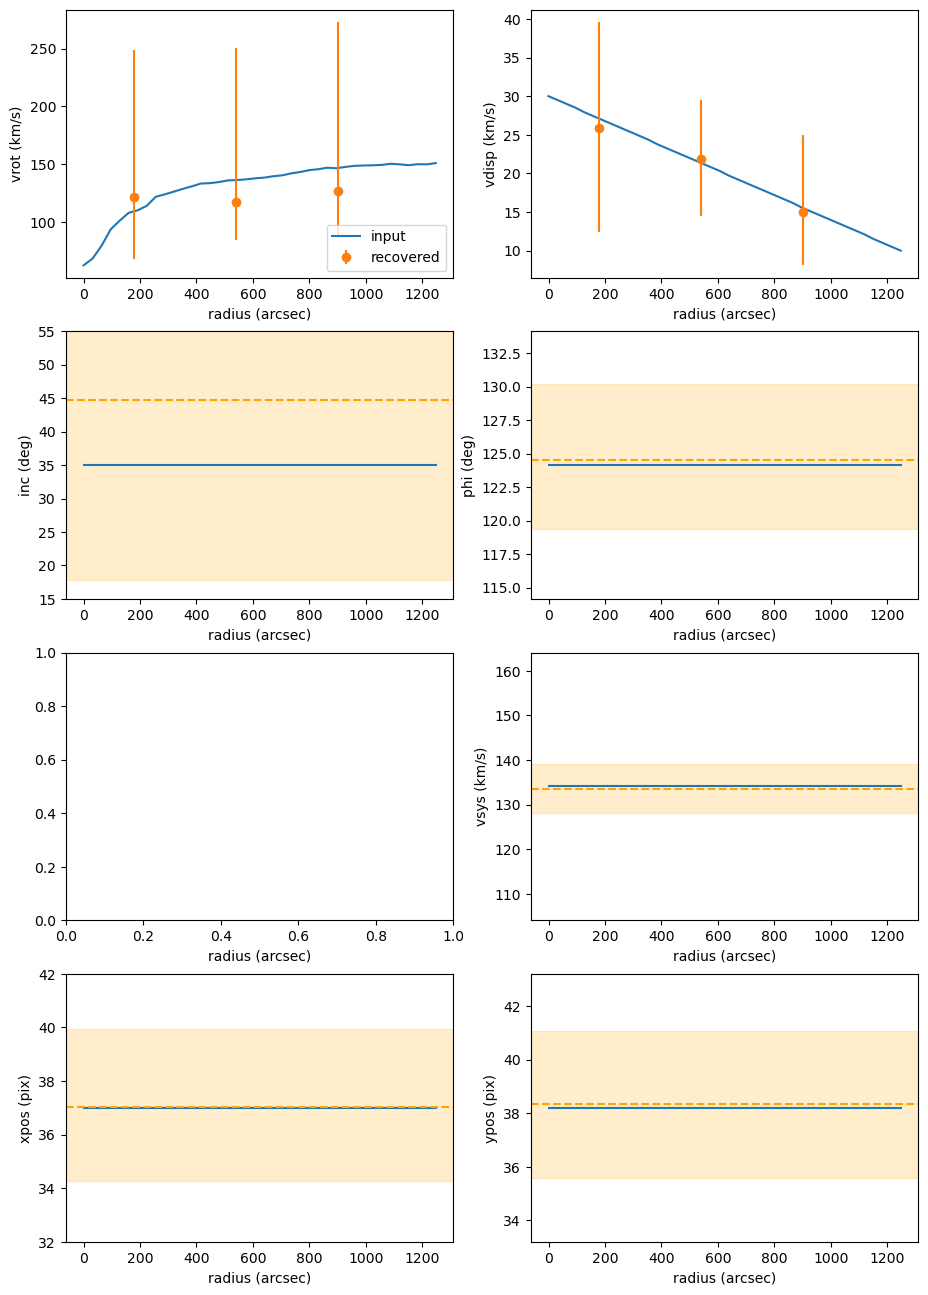

In [ ]:

t = Table.read(ringfile,format='ascii')


fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(11,16))
ax = np.ravel(ax)
for a in ax:
    a.set_xlabel("radius (arcsec)")

rad_mc = f3d._inri.r['radii']

idx = f3d.freepar_idx['vrot']
print(idx)
ax[0].plot(t['RADII'],t['VROT'],label='input')
ax[0].errorbar(rad_mc,pp[idx],fmt='o',yerr=[err_low[idx],err_up[idx]],label='recovered')
ax[0].set_ylabel("vrot (km/s)")
ax[0].legend(loc='lower right')

idx = f3d.freepar_idx['vdisp']
ax[1].plot(t['RADII'],t['VDISP'])
ax[1].errorbar(rad_mc,pp[idx],fmt='o',yerr=[err_low[idx],err_up[idx]])
ax[1].set_ylabel("vdisp (km/s)")

if "inc" in f3d.freepar_idx:
    idx = f3d.freepar_idx['inc']
    ax[2].plot(t['RADII'],t['INC'])
    ax[2].axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
    ax[2].axhline(pp[idx][0],ls='--',color='orange')
    ax[2].set_ylabel("inc (deg)")
    ax[2].set_ylim(t['INC'][0]-20,t['INC'][0]+20)

if "phi" in f3d.freepar_idx:
    idx = f3d.freepar_idx['phi']
    ax[3].plot(t['RADII'],t['PA'])
    ax[3].axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
    ax[3].axhline(pp[idx][0],ls='--',color='orange')
    ax[3].set_ylabel("phi (deg)")
    ax[3].set_ylim(t['PA'][0]-10,t['PA'][0]+10)

#idx = f3d.freepar_idx['z0']
#ax[4].plot(t['RADII'],t['Z0'])
#ax[4].#axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
#ax[4].#axhline(pp[idx][0],ls='--',color='orange')
#ax[4].set_ylabel("z0 (arcs)")
#ax[4].set_ylim(t['Z0'][0]-30,t['Z0'][0]+30)

idx = f3d.freepar_idx['vsys']
ax[5].plot(t['RADII'],t['VSYS'])
ax[5].axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
ax[5].axhline(pp[idx][0],ls='--',color='orange')
ax[5].set_ylabel("vsys (km/s)")
ax[5].set_ylim(t['VSYS'][0]-30,t['VSYS'][0]+30)

if "xpos" in f3d.freepar_idx:
    idx = f3d.freepar_idx['xpos']
    ax[6].plot(t['RADII'],t['XPOS'])
    ax[6].axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
    ax[6].axhline(pp[idx][0],ls='--',color='orange')
    ax[6].set_ylabel("xpos (pix)")
    ax[6].set_ylim(t['XPOS'][0]-5,t['XPOS'][0]+5)

if "ypos" in f3d.freepar_idx:
    idx = f3d.freepar_idx['ypos']
    ax[7].plot(t['RADII'],t['YPOS'])
    ax[7].axhspan(pp[idx][0]-err_low[idx][0],pp[idx][0]+err_up[idx][0],alpha=0.2,color='orange')
    ax[7].axhline(pp[idx][0],ls='--',color='orange')
    ax[7].set_ylabel("ypos (pix)")
    ax[7].set_ylim(t['YPOS'][0]-5,t['YPOS'][0]+5)

fig.savefig(outputfile+'parameters.pdf',bbox_inches='tight')

In [ ]:
# If one wants to change the likelihood and/or prior, can just write a class that inherits
# from BayesianBBarolo and redefine the log_likelihood and prior_transform functions

class CustomBayesianBBarolo(BayesianBBarolo):
    def log_likelihood(self, theta):
        ...

    def prior_transform(self, u):
        ...

custom_f3d = CustomBayesianBBarolo(fitsname)


HEADER WARNING: TELESCOP-INSTRUME keywords not found.

Opening file /Users/blanca/Documents/TESIS/software/code/models/model3_35.fits
Reading 75 x 75 x 62 pixels FITS file (1.3 MB)... Done. 



In [ ]:
#inp = FitsCube(fitsname)
#mod = libBB.Galfit_new_par(inp._cube,inri._rings,opts._params)

# SOME THINGS TO DO 

- Fix parallel execution
- Play with dynesty samplers and parameters (these can be passed to compute() by dynesty_kwargs)
- Decide if residuals are calculated by BB or in python (more flexible)
- Need to implement output model generation + usual plots (various maps, pvs, etc...)
- Easily expandable to fit also other parameters (DENS, VVERT, DVDZ, ZCYL)
- Easily expandable to support functional forms for parameters
- There is a memory leak somewhere, memory usage grows when it should not (not a big problem though).